<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Classification/Logistic_Regression_for_Titanic_Good_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Executive Summary





Logistic Regression was used to estimate who survived vs who died on the Titanic given information about the passangers. Of the many variables avaialable in the dataset, I chose to look only at the following variables as predictors only (Note: This was done for no good reason! This step definetly leaves a lot of room for immprovement)


*   Which class the passanger was in (encoded as a number, either 1,2 or 3)
*   How old the passanger was
*   How many siblings the passanger had on the Titanic with them
*   How many parents the passanger had with them
*   How much their ticket cost (The LOG of this variable was used to make extreme differences between tickets managable)
*   The gender of the passanger

After looking at the data, I ran a logisitic regression with all the variables. The passanger gender seemed to be by far the most import feature. To reduce overfitting, I tried all possible subsets of the variables that included the gender of the passanger and tested which was best using cross validation.

The best subset according the liklihood had 5 variables; the best subset according to the prediction accuracy had only 4 variables.

I reran the model with those variables on the entire dataset and submitted it to Kaggle. My accuracy was 75.4%, which is slightly *worse* than just predicting that all women survived and all males died.


## My kaggle submission

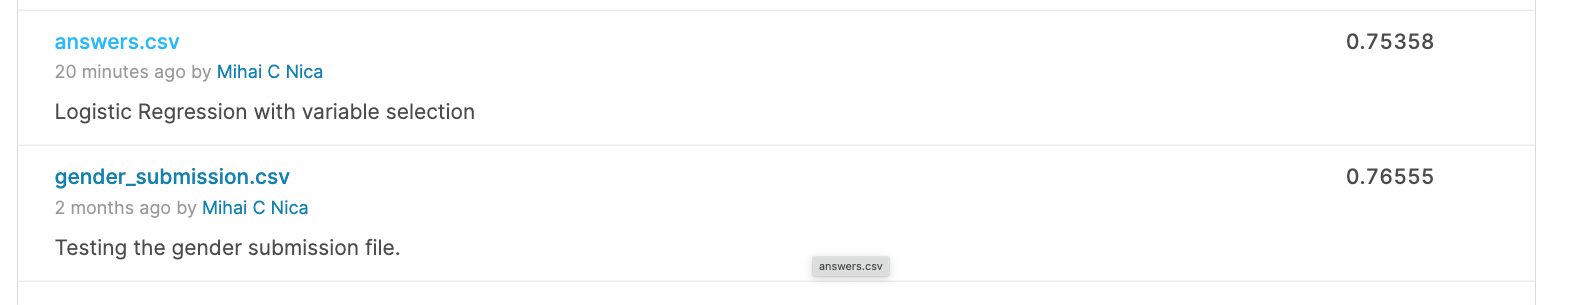

# Ethics Discussion


Since the Titanic disaster was so long ago, there are not many issues from data leaking or the predictions being used in malicious ways. We are insulated from many potential ethical issues by the ~100 years that have passed.

However, in general predicting who lives and who dies is full of ethical issues! For example, if the data is used to try and rescue people, the results of the analysis might inadvertantly effect who lives and who dies in unfair ways. It is important to keep in mind that we are only using this retrospectively and to be NOT use the data for future predictions of disasters.

# Detailed Results

## Load data and delete columns we aren't using

In [ ]:
###
# Import packages
###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
###
# Load the data and see all available columns
###
df = pd.read_csv('titanic_train.csv')


#Setup a binary variable for male
df['Male'] = (df['Sex'] == 'male')*1.0
#Setup using the log of the Fare (rather than Fare itself)
df['logFare'] = np.log(df['Fare']+1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,logFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,2.202765


## Visualize our covariates

A pairplot is used to visualize our covariates. We use the color scheme:


*   Blue = Died
*   Orange = Survived

Info on the covariates we use (taken from Kaggle)


*	Survived: Did they survive?	0 = No, 1 = Yes
* pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* Male: Sex 0=No, 1=Yes
* Age: 	Age in years
* sibsp	# of siblings / spouses aboard the Titanic
* parch	# of parents / children aboard the Titanic
* logFare	 log of the Passenger fare +1 (+1 avoids people who got free ticekts)





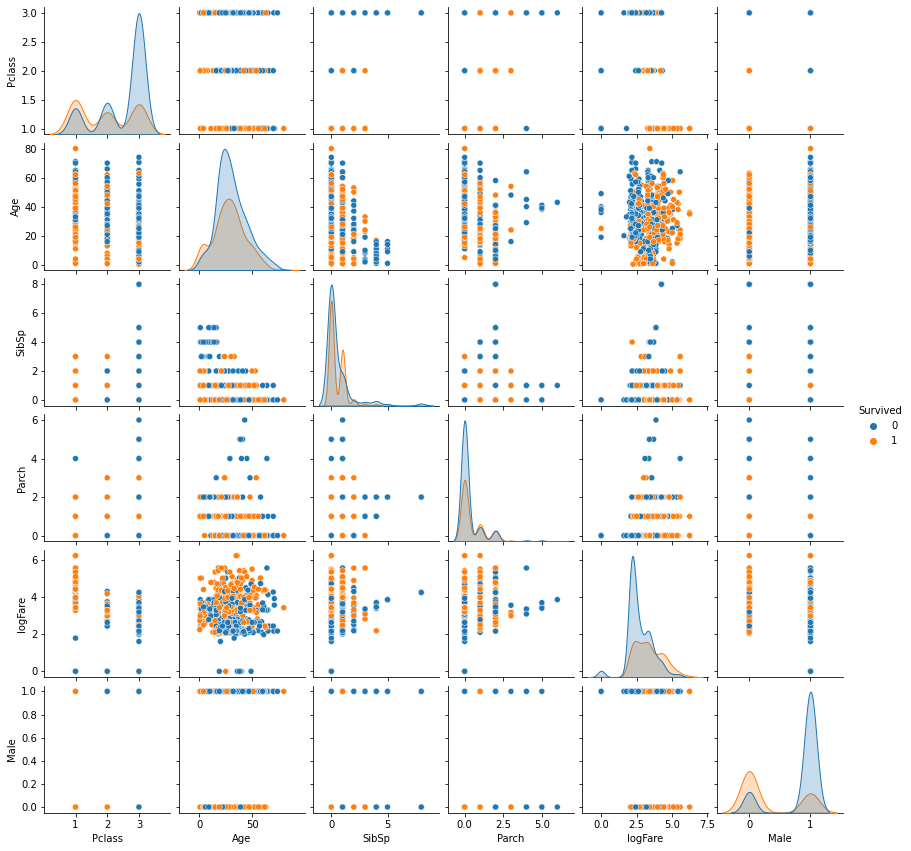

In [ ]:
###
# Pairplot of all our covariates,
# These are the only variables we are looking at here!
###
my_vars = ['Pclass','Age','SibSp','Parch','logFare','Male']

fig_height = 2 #Small figure now, change this if you want it bigger!
sns.pairplot(df, vars=my_vars, hue="Survived",dropna=True,height=fig_height)

## Logistic Regression Result using ALL the variables

Running Logistic Regression using all variables...
---Training Accuracy:
 0.801
---Training CE Loss:
 0.445
---- Coeffients in Logistic Regression ---
('Pclass', -1.1359354726730237)
('Age', -0.0441404404493539)
('SibSp', -0.42168090617811904)
('Parch', -0.09948840622995717)
('logFare', 0.22751404679032464)
('Male', -2.619756652527259)
---Visualizing Predictions Using ALL variables---


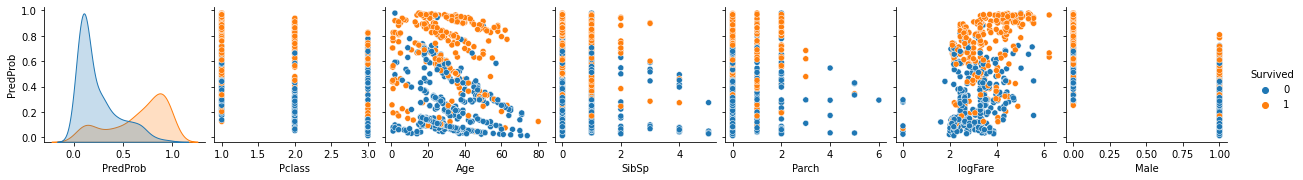

In [ ]:
###
#What happens if we just use ALL the variables?
###
print("Running Logistic Regression using all variables...")
#Dataframe that will include predictions
my_df = df[ ['Survived']+my_vars ].dropna()

#Logistic Regression setup in SciKit learn
X = np.array( my_df[my_vars]  )
Y = np.array( my_df[ 'Survived'] )
LR_model = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
LR_model= LR_model.fit(X, Y)

#Print TRAINING accuracy and CE loss
accuracy = LR_model.score(X,Y)
print(f"---Training Accuracy:\n {accuracy:.3f}")
preds = LR_model.predict_proba(X)[:,1]
CE_loss = np.mean(-Y*np.log(preds) - (1-Y)*np.log(1-preds))
print(f"---Training CE Loss:\n {CE_loss:.3f}")


#Print out info about the coefficients in the logisitc regression
print("---- Coeffients in Logistic Regression ---")
params_dict = dict(list(zip(my_vars,list(LR_model.coef_[0]))))
for item in params_dict.items():
    print(item)


#Add predictions to data frame
my_df['PredProb'] = LR_model.predict_proba(X)[:,1]

#Visualize the predictions
fig_height = 2.5 #Small figure now, change this if you want it bigger!

print("---Visualizing Predictions Using ALL variables---")
sns.pairplot(my_df, y_vars=['PredProb'],x_vars=['PredProb']+my_vars, hue="Survived",dropna=True, height=fig_height)


## Variable selection

We notice from the coefficient in the logistic regression that 'Male' is extrenly important, so we keep this variable. For the other variables, we try to find which subset of the variables would be best. We use cross validation to choose them.

In [ ]:
###
# Setup some helper packages and functions
###

from sklearn.model_selection import train_test_split
import itertools

def powerset(iterable): #returns all possible subsets of a tuple, e.g.
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

def LR_using_vars(my_var_list, X_train,Y_train,X_test,Y_test, Verbose=False):
  #Do the logisitc regression using only the variables from my_var_list
  #Return the accuracy and CE_loss on the test set, as well as the entire model

  #Note: Set the "verbose" flag to true to print out lots of details
  if Verbose:
    print("-----------------------")
    print(f"Vars: {my_vars}")
    print("-----------------------")


  LR_model = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
  LR_fit = LR_model.fit(X_train, Y_train)

  accuracy = LR_model.score(X_test,Y_test)
  preds = LR_model.predict_proba(X_test)[:,1]
  CE_loss = np.mean(-Y_test*np.log(preds) - (1-Y_test)*np.log(1-preds))
  if Verbose:
    print(f"  Test Accuracy:\n {accuracy:.3f}")
    print(f"  CE Loss:\n {CE_loss:.3f}")
    print("  Coeffs:")
    params_dict = dict(list(zip(my_var_list,list(LR_model.coef_[0]))))
    for item in params_dict.items():
        print(f'    {item[0]} : {item[1]:.3f}')

  return accuracy, CE_loss, LR_fit

In [ ]:
###
# Try all possible subsets that include 'Male' and report the best one
###
#Try all subsets that include 'Male'

best_CE_val = np.inf
best_CE_vars = []

best_Acc_val = 0
best_Acc_vars = []

#try all possibilities and store the best one
for my_vars in [ list(subset)  +['Male'] for subset in powerset(['Pclass','Age','SibSp','Parch','logFare']) ]:

  X = np.array( my_df[my_vars]  )
  Y = np.array( my_df[ 'Survived'] )

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #change test size if you want!

  accuracy,CE_loss,_ = LR_using_vars(my_vars, X_train,Y_train,X_test,Y_test,Verbose=False) #set verbose to true for lots of printouts!

  if accuracy > best_Acc_val:
    best_Acc_val = accuracy
    best_Acc_vars = my_vars

  if CE_loss < best_CE_val:
    best_CE_val = CE_loss
    best_CE_vars = my_vars


print("##################")
print(f"Best Test Acc {best_Acc_val:.3f} from {best_Acc_vars}")
print(f"Best Test CE {best_CE_val:.3f} from {best_CE_vars}")



##################
Best Test Acc 0.769 from ['Age', 'SibSp', 'logFare', 'Male']
Best Test CE 0.498 from ['Pclass', 'SibSp', 'Parch', 'logFare', 'Male']


In [ ]:
###
# Run the model again with the entire dataset
###

my_vars = ['Age', 'SibSp', 'logFare', 'Male'] #best choice according to test accuracy!

#put in X,Y for both the train and test sets
print(f"Running on the entire dataset:")
X = np.array( my_df[my_vars]  )
Y = np.array( my_df[ 'Survived'] )
accuracy,CE_loss,LR_model = LR_using_vars(my_vars, X_train=X,Y_train=Y,X_test=X,Y_test=Y,Verbose=True)

Running on the entire dataset:
-----------------------
Vars: ['Age', 'SibSp', 'logFare', 'Male']
-----------------------
  Test Accuracy:
 0.784
  CE Loss:
 0.471
  Coeffs:
    Age : -0.028
    SibSp : -0.662
    logFare : 0.982
    Male : -2.380


## Run model on Kaggle test set

In [ ]:
###
# Printout Final answers for Kaggle to CSV
###
test_df = pd.read_csv('titanic_test.csv')
test_df['Male'] = (test_df['Sex'] == 'male')*1.0
test_df['logFare'] = np.log(test_df['Fare']+1)
test_df = test_df.fillna(test_df.mean())
X = np.array( test_df[my_vars]  )

test_df['Survived'] = LR_model.predict(X)

answers = test_df[ ['PassengerId','Survived']  ]

answers.to_csv('answers.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


# Interpretations

## Number of Variables

In our final model, we were able to get very similar accuracy/CE_loss with only 4 variables instead of using all the variables. This suggests that the variables which were ommited (like which class you are in), did not seem to help predict much given the other data. (For example, you can probably predict which class you are in using the fare paid)

## Discussion about coefficients

The final coefficients were:
*  Age : -0.028
*  SibSp : -0.662
*  logFare : 0.982
*  Male : -2.380

This shows that the biggest effect is that Males were unlikely to survive. To a less degree: Older people were less likely to survive. Spending more on your ticket also made you more likely to survive. Note that the coefficient for age seems to be quiet small, but there was a large variation in this variable (e.g. a 50 year old vs a 10 year old would be effected by 40*(0.03)=1.2 which is a large log-odds effect!)

## Discussion about final result

The final results are quite poor. This suggests we probably should do something else. In particular, since being male/female seems to be so important, we should probably use that featuree more. Maybe we could try stratifying the data into two groups: male and female, and then run a seperate logisitic regression for each.

